In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set()
from itertools import combinations
from collections import Counter
%matplotlib inline

In [2]:
data = pd.read_csv('movie_bd_v5.csv')
data.sample(5)

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year
466,tt1287468,85000000,112483764,Cats & Dogs 2 : The Revenge of Kitty Galore,James Marsden|Nick Nolte|Christina Applegate|B...,Brad Peyton,Just like real spies... only furrier.,The ongoing war between the canine and feline ...,82,Comedy|Family,Village Roadshow Pictures,7/30/2010,5.0,2010
1024,tt1855199,7000000,48126384,End of Watch,Jake Gyllenhaal|Michael PeÃ±a|Natalie Martinez...,David Ayer,Every moment of your life they stand watch,"Shot documentary-style, this film follows the ...",109,Crime|Drama|Thriller,Emmett/Furla Films|Exclusive Media Group|Hedge...,9/20/2012,7.1,2012
1167,tt0310281,6000000,18750246,A Mighty Wind,Bob Balaban|Christopher Guest|John Michael Hig...,Christopher Guest,"Back together for the first time, again.","In ""A Mighty Wind"", director Christopher Guest...",91,Comedy|Music,Castle Rock Entertainment,4/16/2003,6.5,2003
1624,tt0358135,50000000,170128460,Shall We Dance?,Richard Gere|Jennifer Lopez|Susan Sarandon|Lis...,Peter Chelsom,Step out of the ordinary,"A romantic comedy where a bored, overworked Es...",107,Drama|Romance|Comedy,Miramax Films,10/15/2004,5.8,2004
459,tt1126618,40000000,58785180,Morning Glory,Rachel McAdams|Harrison Ford|Patrick Wilson|Je...,Roger Michell,Breakfast TV just got interesting.,When hard-working TV producer Becky Fuller is ...,102,Comedy|Drama|Romance,Bad Robot|Goldcrest Pictures,1/12/2010,6.1,2010


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               1889 non-null   object 
 1   budget                1889 non-null   int64  
 2   revenue               1889 non-null   int64  
 3   original_title        1889 non-null   object 
 4   cast                  1889 non-null   object 
 5   director              1889 non-null   object 
 6   tagline               1889 non-null   object 
 7   overview              1889 non-null   object 
 8   runtime               1889 non-null   int64  
 9   genres                1889 non-null   object 
 10  production_companies  1889 non-null   object 
 11  release_date          1889 non-null   object 
 12  vote_average          1889 non-null   float64
 13  release_year          1889 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 206.7+ KB


In [4]:
data.describe()

,budget,revenue,runtime,vote_average,release_year
count,1.889000e+03,1.889000e+03,1889.000000,1889.000000,1889.000000
mean,5.431083e+07,1.553653e+08,109.658549,6.140762,2007.860773
std,4.858721e+07,2.146698e+08,18.017041,0.764763,4.468841
min,5.000000e+06,2.033165e+06,63.000000,3.300000,2000.000000
25%,2.000000e+07,3.456058e+07,97.000000,5.600000,2004.000000
50%,3.800000e+07,8.361541e+07,107.000000,6.100000,2008.000000
75%,7.200000e+07,1.782626e+08,120.000000,6.600000,2012.000000
max,3.800000e+08,2.781506e+09,214.000000,8.100000,2015.000000


# Предобработка

In [5]:
answers = {} # создадим словарь для ответов

# добавляем колонку profit (profit=revenue-budget)
data['profit'] = data.revenue - data.budget

# переводим дату в формат DateTime
data.release_date = pd.to_datetime(data['release_date'])

# создадим копию датасета
data2 = data.copy()

# создадим функцию для разделения значений в ячейках
def splitting(series_obj):
    return series_obj.split("|")

# заменяем значения в ячейках на списки (где необходимо)
data2.genres = data2.genres.apply(splitting)
data2.director = data2.director.apply(splitting)
data2.cast = data2.cast.apply(splitting)
data2.production_companies = data2.production_companies.apply(splitting)

# 1. У какого фильма из списка самый большой бюджет?

In [6]:
answers['1'] = 'Pirates of the Caribbean: On Stranger Tides (tt1298650)'

In [7]:
data[data.budget == data.budget.max()]

,imdb_id,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_average,release_year,profit
723,tt1298650,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,Captain Jack Sparrow crosses paths with a woma...,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,6.3,2011,641683000


ВАРИАНТ 2

In [8]:
data.loc[data.budget.idxmax()]['original_title']

'Pirates of the Caribbean: On Stranger Tides'

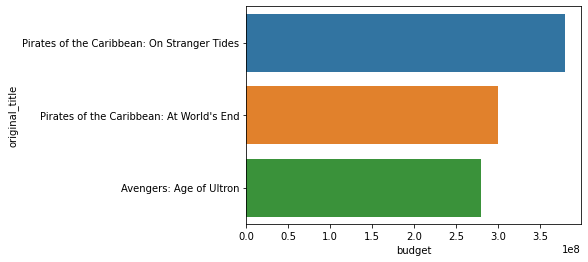

In [9]:
temp = data.sort_values(by = 'budget', ascending = False).head(3)
sns.barplot(y = 'original_title', x = 'budget', data = temp)

# 2. Какой из фильмов самый длительный (в минутах)?

In [ ]:
answers['2'] = 'Gods and Generals (tt0279111)'

In [26]:
data[data.runtime == data.runtime.max()][['original_title', 'runtime']]

,original_title,runtime
1157,Gods and Generals,214


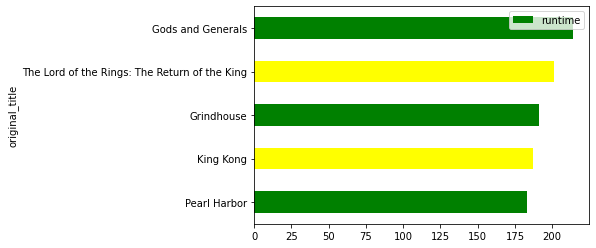

In [18]:
data.sort_values(by = 'runtime').tail(5).plot.barh(y = 'runtime', x = 'original_title', color = ['green','yellow'])

# 3. Какой из фильмов самый короткий (в минутах)?





In [ ]:
answers['3'] = 'Winnie the Pooh'

In [22]:
data.loc[data.runtime.idxmin()][['original_title']]

original_title    Winnie the Pooh
Name: 768, dtype: object

# 4. Какова средняя длительность фильмов?


In [ ]:
answers['4'] = '109.66'

In [ ]:
data.runtime.mean()

# 5. Каково медианное значение длительности фильмов? 

In [ ]:
answers['5'] = '107'

In [ ]:
data.runtime.median()

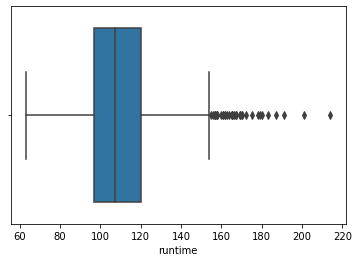

In [28]:
sns.boxplot(x = 'runtime', data = data)

# 6. Какой самый прибыльный фильм?
#### Внимание! Здесь и далее под «прибылью» или «убытками» понимается разность между сборами и бюджетом фильма. (прибыль = сборы - бюджет) в нашем датасете это будет (profit = revenue - budget) 

In [ ]:
answers['6'] = 'Avatar'

In [29]:
data.loc[data.profit.idxmax()][['original_title']]

original_title    Avatar
Name: 239, dtype: object

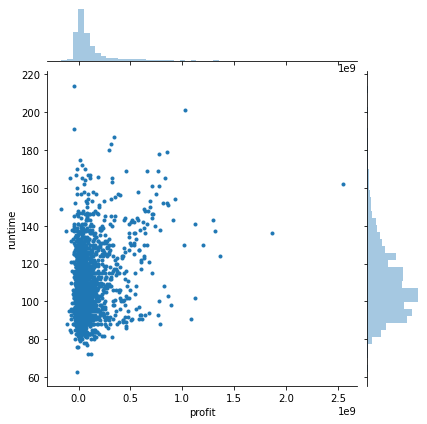

In [47]:
sns.jointplot(data = data, x = 'profit', y = 'runtime', marker = '.')

# 7. Какой фильм самый убыточный? 

In [ ]:
answers['7'] = 'The Lone Ranger'

In [49]:
data[data.profit == data.profit.min()][['original_title', 'profit']]

,original_title,profit
1245,The Lone Ranger,-165710090


# 8. У скольких фильмов из датасета объем сборов оказался выше бюджета?

In [ ]:
answers['8'] = '1478'

In [ ]:
len(data.profit[data.profit > 0])

In [ ]:
len(data.query('profit > 0'))

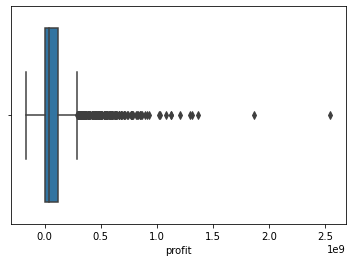

In [58]:
sns.boxplot(data = data, x = 'profit')

# 9. Какой фильм оказался самым кассовым в 2008 году?

In [ ]:
answers['9'] = 'The Dark Knight'

In [9]:
data_temp = data[data.release_year == 2008]
data_temp.query('revenue == revenue.max()')['original_title']

599    The Dark Knight
Name: original_title, dtype: object

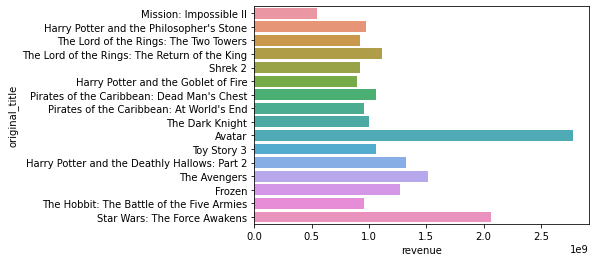

In [60]:
data_temp = data.loc[data.groupby('release_year').revenue.idxmax()][['original_title', 'revenue', 'release_year']]
data_temp.index = data_temp.release_year
del data_temp['release_year']
sns.barplot(data = data_temp, x = 'revenue', y = 'original_title')

# 10. Самый убыточный фильм за период с 2012 по 2014 г. (включительно)?


In [ ]:
answers['10'] = 'The Lone Ranger'

In [ ]:
data_temp = data[(data.release_year >= 2012) & (data.release_year < 2015)]
data_temp.loc[data_temp.profit.idxmin()]['original_title']

# 11. Какого жанра фильмов больше всего?

In [10]:
answers['11'] = 'Drama'

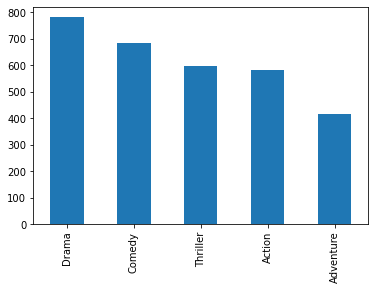

In [11]:
data.genres.str.split('|').explode().value_counts().head(5).plot(kind = 'bar')

ВАРИАНТ 2

In [12]:
c = Counter()
for x in data.genres.apply(splitting):
    c += Counter(x)

print(c)

Counter({'Drama': 782, 'Comedy': 683, 'Thriller': 596, 'Action': 582, 'Adventure': 415, 'Crime': 315, 'Romance': 308, 'Family': 260, 'Science Fiction': 248, 'Fantasy': 222, 'Horror': 176, 'Mystery': 168, 'Animation': 139, 'Music': 64, 'History': 62, 'War': 58, 'Western': 19, 'Documentary': 8, 'Foreign': 2})


# 12. Фильмы какого жанра чаще всего становятся прибыльными? 

In [ ]:
answers['12'] = 'Drama'

In [61]:
data2.genres.explode()[data2.profit > 0].value_counts()

Drama              560
Comedy             551
Thriller           446
Action             444
Adventure          337
Romance            242
Crime              231
Family             226
Science Fiction    195
Fantasy            188
Horror             150
Animation          120
Mystery            119
Music               47
History             46
War                 41
Western             12
Documentary          7
Name: genres, dtype: int64

##### На самом деле "драматические" фильмы не становятся чаще всего прибыльными. Это случается в 72% случаев.
##### Чаще всего прибыльными становятся "документальные фильмы" - 87,5%. Но такие фильмы встречаются всего 8 раз.
##### Поэтому, можно утверждать, что чаще всего становятся прибыльными "семейные" фильмы.

In [62]:
# посчитаем сколько раз, встречается каждый жанр
a = data2.explode('genres').genres.value_counts()

# посчитаем прибыльные фильмы
b = data2[data2.profit > 0].explode('genres').genres.value_counts()

# узнаем в каком соотношении жанры фильмов становятся прибыльными
x = b/a
x.sort_values(ascending = False)

Documentary        0.875000
Family             0.869231
Animation          0.863309
Horror             0.852273
Fantasy            0.846847
Adventure          0.812048
Comedy             0.806735
Science Fiction    0.786290
Romance            0.785714
Action             0.762887
Thriller           0.748322
History            0.741935
Music              0.734375
Crime              0.733333
Drama              0.716113
Mystery            0.708333
War                0.706897
Western            0.631579
Foreign                 NaN
Name: genres, dtype: float64

# 13. У какого режиссера самые большие суммарные кассовые сбооры?

In [ ]:
answers['13'] = 'Peter Jackson'

In [64]:
data_temp = data2.explode('director')
data_temp = data_temp.groupby('director').sum()
data_temp.revenue.idxmax()

'Peter Jackson'

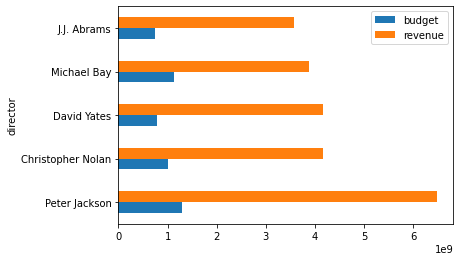

In [65]:
data_temp = data_temp.sort_values(by = 'revenue', ascending = False).head(5)
data_temp.reset_index().plot.barh(x = 'director', y = ['budget', 'revenue'])

# 14. Какой режисер снял больше всего фильмов в стиле Action?

In [ ]:
answers['14'] = 'Robert Rodriguez'

In [66]:
data_temp = data2.explode('director').explode('genres')
data_temp = data_temp.pivot_table(values = 'budget', index = 'director', columns = 'genres', aggfunc='count',)
data_temp.Action.idxmax()

'Robert Rodriguez'

# 15. Фильмы с каким актером принесли самые высокие кассовые сборы в 2012 году? 

In [ ]:
answers['15'] = 'Chris Hemsworth'

In [30]:
data_temp = data2.explode('cast')
data_temp = data_temp.pivot_table(values = 'revenue', index = 'cast', columns = 'release_year', aggfunc = 'sum')
data_temp[2012].idxmax()

'Chris Hemsworth'

In [33]:
data_temp = data2.explode('cast')
data_temp[data_temp.release_year == 2012][['cast', 'revenue']].sort_values(by = 'revenue', ascending = False).head()

,cast,revenue
970,Robert Downey Jr.,1519557910
970,Mark Ruffalo,1519557910
970,Chris Hemsworth,1519557910
970,Scarlett Johansson,1519557910
970,Chris Evans,1519557910


# 16. Какой актер снялся в большем количестве высокобюджетных фильмов?

In [ ]:
answers['16'] = 'Matt Damon'

Matt Damon           18
Adam Sandler         17
Angelina Jolie       16
Samuel L. Jackson    15
Eddie Murphy         15
Name: cast, dtype: int64

<BarContainer object of 5 artists>

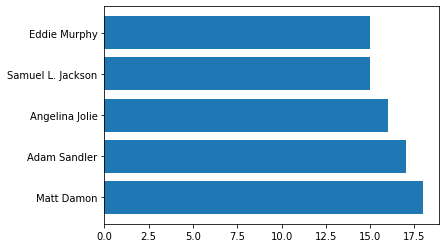

In [77]:
data_temp = data2.explode('cast')
data_temp = data_temp[data_temp.budget > data_temp.budget.mean()].cast.value_counts().head(5)
display(data_temp)
plt.barh(data = data_temp, y = data_temp.index, width = data_temp.values)

# 17. В фильмах какого жанра больше всего снимался Nicolas Cage? 

In [ ]:
answers['17'] = 'Action'

In [ ]:
data_temp = data2.explode('cast').explode('genres')
data_temp = data_temp.pivot_table(values = 'budget', index = 'cast', columns = 'genres', aggfunc = 'count')
data_temp.loc['Nicolas Cage'].sort_values(ascending = False)

Action             17
Thriller           15
Drama              12
Crime              10
Fantasy             8
Adventure           7
Comedy              6
Science Fiction     4
Family              3
Mystery             3
Animation           3
History             2
Romance             1
War                 1
Horror              1
Name: genres, dtype: int64

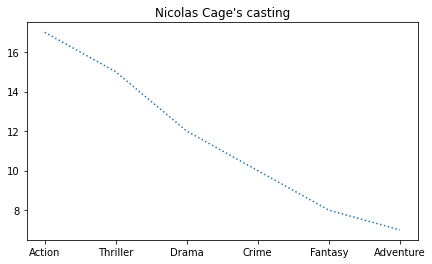

In [59]:
data_temp = data2.explode('cast').explode('genres')
data_temp = data_temp.loc[data_temp['cast'] == 'Nicolas Cage'].genres.value_counts()
display(data_temp)
data_temp.head(6).plot(linestyle = ':', figsize = (7,4), title = "Nicolas Cage's casting")

# 18. Самый убыточный фильм от Paramount Pictures

In [ ]:
answers['18'] = 'K-19'

In [ ]:
data_temp = data2.explode('production_companies')
data_temp = data_temp[data_temp.production_companies.str.contains('Paramount')]
data_temp.loc[data_temp.profit.idxmin()]['original_title']

# 19. Какой год стал самым успешным по суммарным кассовым сборам?

In [ ]:
answers['19'] = 2015

In [ ]:
data_temp = data.groupby('release_year')[['revenue']].sum()
data_temp.loc[data_temp.idxmax()]

# 20. Какой самый прибыльный год для студии Warner Bros?

In [ ]:
answers['20'] = '2014'

In [ ]:
data_temp = data[data.production_companies.str.contains('Warner')]
data_temp = data_temp.groupby('release_year').sum()
data_temp.profit.idxmax()

# 21. В каком месяце за все годы суммарно вышло больше всего фильмов?

In [ ]:
answers['21'] = 'September'

In [60]:
data.release_date.dt.month.value_counts()

9     227
12    190
10    186
8     161
3     156
4     149
6     147
11    146
7     142
5     140
2     135
1     110
Name: release_date, dtype: int64

Text(0.5, 1.0, 'Release by month')

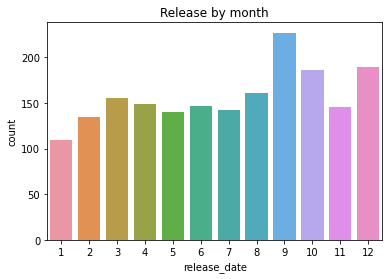

In [66]:
data_temp = data.release_date.dt.month.value_counts()
sns.countplot(data = data, x = data.release_date.dt.month).set_title('Release by month')

# 22. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)

In [ ]:
answers['22'] = 450

In [ ]:
data_temp = data.release_date.dt.month.value_counts()
answer = data_temp.loc[6] + data_temp.loc[7] + data_temp.loc[8]
print(answer)

In [ ]:
data_temp = data.query('5 < release_date.dt.month < 9')
len(data_temp)

# 23. Для какого режиссера зима – самое продуктивное время года? 

In [ ]:
answers['23'] = 'Peter Jackson'

In [ ]:
data_temp = data2.explode('director')
data_temp = data_temp.query('release_date.dt.month < 3 or release_date.dt.month == 12')
data_temp = data_temp.groupby('director').count()
data_temp.original_title.idxmax()

# 24. Какая студия дает самые длинные названия своим фильмам по количеству символов?

In [ ]:
answers['24'] = 'Four By Two Productions'

In [ ]:
data_temp = data2.explode('production_companies')
data_temp.original_title = data_temp.original_title.apply(lambda x: len(x))
data_temp = data_temp.groupby('production_companies').mean()
data_temp.original_title.idxmax()

# 25. Описание фильмов какой студии в среднем самые длинные по количеству слов?

In [ ]:
answers['25'] = 'Midnight Picture Show'

In [110]:
data_temp = data2.explode('production_companies')
data_temp.overview = data_temp.overview.str.split(' ')
data_temp.overview = data_temp.overview.apply(lambda x: len(x))
data_temp = data_temp.groupby('production_companies').mean()
data_temp.overview.idxmax()

'Midnight Picture Show'

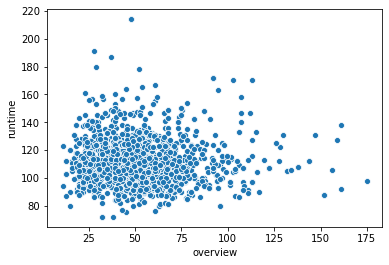

In [120]:
sns.scatterplot(data = data_temp, x = 'overview', y = 'runtime')

# 26. Какие фильмы входят в 1 процент лучших по рейтингу? 
по vote_average

In [ ]:
answers['26'] = 'Inside Out, The Dark Knight, 12 Years a Slave'

In [78]:
data.loc[data['vote_average']>data.quantile(0.99, numeric_only=True)['vote_average']]['original_title']

9                                          Inside Out
34                                               Room
118                                      Interstellar
119                           Guardians of the Galaxy
125                                The Imitation Game
128                                         Gone Girl
138                          The Grand Budapest Hotel
370                                         Inception
599                                   The Dark Knight
872                                       The Pianist
1081    The Lord of the Rings: The Return of the King
1183                          The Wolf of Wall Street
1191                                 12 Years a Slave
1800                                          Memento
Name: original_title, dtype: object

# 27. Какие актеры чаще всего снимаются в одном фильме вместе?


In [ ]:
answers['27'] = 'Daniel Radcliffe, Rupert Grint'

In [ ]:
pairs_actors = {}

for actors in data.cast.str.split('|'):
    for actor in list(combinations(actors, 2)):
        if actor in pairs_actors:
            pairs_actors[actor] += 1
        else:
            pairs_actors[actor] = 1

max(pairs_actors, key=pairs_actors.get)

# Submission

In [ ]:
# в конце можно посмотреть свои ответы к каждому вопросу
answers

In [ ]:
# и убедиться что ни чего не пропустил)
len(answers)